# A MULTI-OBJECTIVE APPROACH FOR PRACTICAL PORTFOLIO OPTIMIZATION PROBLEM

https://www.atlantis-press.com/article/23389.pdf

https://github.com/milad-s5/MULTI-OBJECTIVE-APPROACH-FOR-PRACTICAL-PORTFOLIO-OPTIMIZATION-PROBLEM <font color='green'><- interpretation</font>


https://sci-hub.se/10.1109/4235.996017

## Install requirements

In [ ]:
pip install -U pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210078 sha256=72610f82d2b0d481c0e5939350c593fe9064d80897529f974a0285548dad93d8
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Import yfinance package
import yfinance as yf

# Set the start and end date
start_date = '2017-01-01' #'2015-01-01'
end_date = '2019-12-31'   #'2022-07-12'


ticker = ['MMM', 'SNPS', 'NI', 'CAH', 'SNA', 'PNC', 'BALL', 'DVN',
               'HPQ', 'ADP', 'CI', 'XEL', 'PFG', 'MCO', 'DLR', 'ILMN', 'XOM',
               'YUM', 'GOOGL', 'T', 'ROL', 'PG', 'WY', 'CMS', 'CTAS', 'PSA',
               'FITB', 'ED', 'HUM', 'XRAY', 'OKE', 'AMZN', 'ALL', 'DHI', 'CNP',
               'D', 'IPG', 'MOS', 'SRE', 'NOC', 'LRCX', 'HOLX', 'CAG', 'STZ', 'ITW',
               'SYF', 'CCL']

# Get the data
data = yf.download(ticker, start_date, end_date)
data

[*********************100%%**********************]  47 of 47 completed


Price        Adj Close                                               \
Ticker             ADP         ALL       AMZN       BALL        CAG   
Date                                                                  
2017-01-03   88.806778   62.804119  37.683498  35.217251  31.669168   
2017-01-04   88.944084   62.973457  37.859001  35.751896  31.135500   
2017-01-05   88.412086   62.685555  39.022499  35.733295  31.023993   
2017-01-06   88.472145   62.787159  39.799500  35.891376  30.856731   
2017-01-09   87.923019   61.889591  39.846001  35.324169  30.617773   
...                ...         ...        ...        ...        ...   
2019-12-23  155.396072   99.316566  89.650002  62.350170  29.288334   
2019-12-24  155.295563   99.576317  89.460503  62.331066  29.314157   
2019-12-26  155.697723   99.961487  93.438499  62.025284  29.004229   
2019-12-27  156.081604  100.203323  93.489998  61.815075  29.426079   
2019-12-30  155.003067  100.113754  92.344498  61.576168  29.305550   

Price                                                               ...  \
Ticker            CAH        CCL          CI        CMS        CNP  ...   
Date                                                                ...   
2017-01-03  59.120476  46.789989  128.141037  33.555611  19.397057  ...   
2017-01-04  60.033314  47.400211  130.973541  33.741447  19.570599  ...   
2017-01-05  59.136333  48.198895  133.796585  33.927277  19.570599  ...   
2017-01-06  59.795151  48.145042  133.890991  34.056557  20.004454  ...   
2017-01-09  59.342709  48.180939  134.400803  33.596012  19.625813  ...   
...               ...        ...         ...        ...        ...  ...   
2019-12-23  44.529629  50.668629  195.084595  54.916691  23.773581  ...   
2019-12-24  44.668983  50.352322  192.760239  54.907864  23.800261  ...   
2019-12-26  44.564472  50.737823  193.109848  54.907864  23.933674  ...   
2019-12-27  44.851864  50.737823  192.750793  55.137093  23.933674  ...   
2019-12-30  44.216103  50.431400  191.777603  55.181175  23.933674  ...   

Price        Volume                                                          \
Ticker         SNPS      SRE       STZ      SYF         T       WY      XEL   
Date                                                                          
2017-01-03   595800  2226400   1991400  6058100  34432738  2650200  2065100   
2017-01-04   790300  2778200   2972300  6040100  30720772  3678500  2542600   
2017-01-05  1081200  4016200  10511800  6850800  34041629  3548000  2611900   
2017-01-06   647900  1869200   4441900  5110200  43278780  2679300  1707400   
2017-01-09   496000  2010200   2129600  3955400  33741743  4017600  1840100   
...             ...      ...       ...      ...       ...      ...      ...   
2019-12-23  1073200  2964400    804400  3005200  38581095  2724600  4148100   
2019-12-24   417800  1084800    400200  1135000  11515093   750300   956900   
2019-12-26   539400  1596200    807700  2651500  26239032  1448300  1324900   
2019-12-27   533400  1464000    568600  2932200  20430247  1807700  1931200   
2019-12-30   613200  2184600    901000  2568100  23389652  2327000  1717700   

Price                                   
Ticker           XOM     XRAY      YUM  
Date                                    
2017-01-03  10360600  1778000  4793400  
2017-01-04   9434200   978300  2835200  
2017-01-05  14443200  1114500  4040000  
2017-01-06  16518100  1169600  2863800  
2017-01-09  13762300   950600  1944200  
...              ...      ...      ...  
2019-12-23  14172500  1162900  1205600  
2019-12-24   3979400   579400   656400  
2019-12-26   8840200   708800  1176900  
2019-12-27  10516100   664700  1130500  
2019-12-30  12689400  1283000  1185800  

[753 rows x 282 columns]

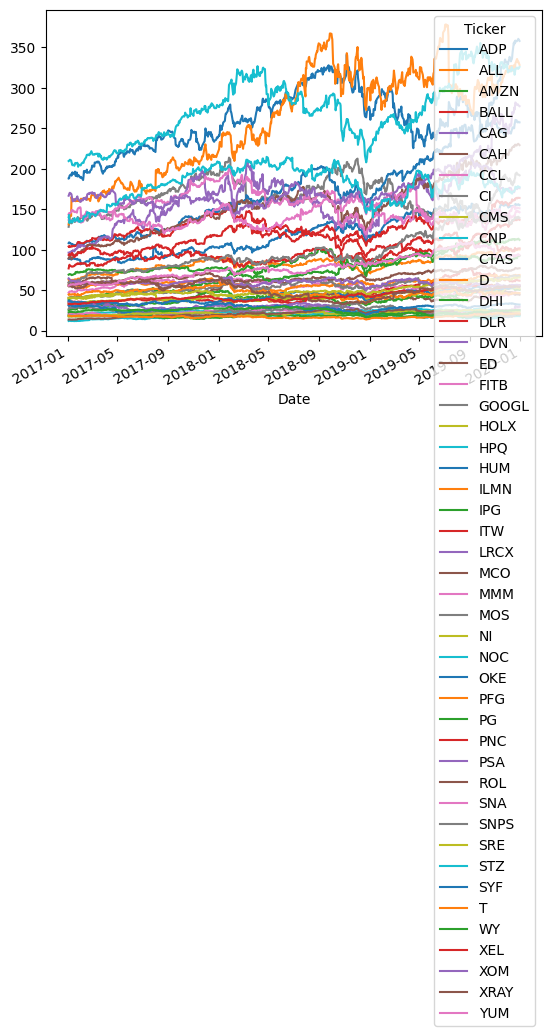

In [ ]:
# Plot adjusted close price data
data['Adj Close'].plot()
plt.show()

In [ ]:
# Closing price
data = data['Adj Close']
data

Ticker,ADP,ALL,AMZN,BALL,CAG,CAH,CCL,CI,CMS,CNP,...,SNPS,SRE,STZ,SYF,T,WY,XEL,XOM,XRAY,YUM
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,88.806778,62.804119,37.683498,35.217251,31.669168,59.120476,46.789989,128.141037,33.555611,19.397057,...,59.369999,40.144436,139.909668,30.857571,18.589613,22.563396,32.710793,64.500000,54.809017,55.535843
2017-01-04,88.944084,62.973457,37.859001,35.751896,31.135500,60.033314,47.400211,130.973541,33.741447,19.570599,...,59.570000,40.489784,142.838943,31.581951,18.481586,22.764059,32.855740,63.790359,55.257793,55.737930
2017-01-05,88.412086,62.685555,39.022499,35.733295,31.023993,59.136333,48.198895,133.796585,33.927277,19.570599,...,59.790001,40.394524,132.676849,30.732672,18.429735,23.001877,32.855740,62.839443,54.537872,55.922443
2017-01-06,88.472145,62.787159,39.799500,35.891376,30.856731,59.795151,48.145042,133.890991,34.056557,20.004454,...,60.000000,40.854984,135.108887,30.915855,18.130814,22.927559,32.952389,62.803940,54.500477,56.598942
2017-01-09,87.923019,61.889591,39.846001,35.324169,30.617773,59.342709,48.180939,134.400803,33.596012,19.625813,...,60.080002,40.243671,135.859314,30.724342,17.902645,23.016747,32.453102,61.767860,54.668758,56.757092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,155.396072,99.316566,89.650002,62.350170,29.288334,44.529629,50.668629,195.084595,54.916691,23.773581,...,139.910004,64.965744,176.808395,32.314743,21.080650,25.496880,55.229630,56.508709,54.500240,92.287971
2019-12-24,155.295563,99.576317,89.460503,62.331066,29.314157,44.668983,50.352322,192.760239,54.907864,23.800261,...,138.210007,65.004578,175.670670,32.305855,21.021299,25.251560,55.445740,56.291637,54.528828,92.768776
2019-12-26,155.697723,99.961487,93.438499,62.025284,29.004229,44.564472,50.737823,193.109848,54.907864,23.933674,...,140.070007,65.423141,178.331604,32.252480,21.129211,25.369997,55.383995,56.380070,53.975033,94.118744


<Axes: xlabel='Ticker'>

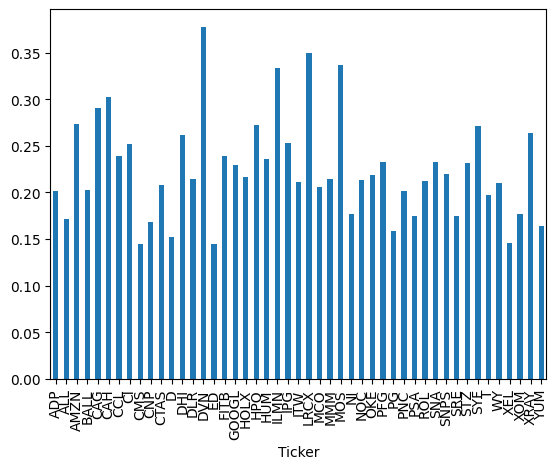

In [ ]:
# Volatility of stocks
data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

## Process on all dataset


In [ ]:
# Log of percentage change
cov_matrix = data.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Ticker,ADP,ALL,AMZN,BALL,CAG,CAH,CCL,CI,CMS,CNP,...,SNPS,SRE,STZ,SYF,T,WY,XEL,XOM,XRAY,YUM
Ticker,,,,,,,,,,,,,,,,,,,,,
ADP,0.000163,0.000059,0.000098,0.000057,0.000050,0.000053,0.000058,0.000046,2.721401e-05,0.000033,...,0.000097,0.000026,0.000045,7.580912e-05,0.000042,0.000055,2.838839e-05,0.000052,0.000041,0.000050
ALL,0.000059,0.000117,0.000051,0.000030,0.000046,0.000033,0.000055,0.000038,1.773275e-05,0.000024,...,0.000054,0.000019,0.000026,6.820512e-05,0.000045,0.000033,1.542582e-05,0.000039,0.000027,0.000052
AMZN,0.000098,0.000051,0.000298,0.000056,0.000035,0.000060,0.000101,0.000072,4.592302e-06,0.000027,...,0.000136,0.000018,0.000070,8.880994e-05,0.000032,0.000083,4.252105e-06,0.000061,0.000064,0.000056
BALL,0.000057,0.000030,0.000056,0.000164,0.000050,0.000056,0.000039,0.000036,3.190443e-05,0.000025,...,0.000061,0.000029,0.000031,5.251430e-05,0.000032,0.000048,2.966266e-05,0.000026,0.000050,0.000043
CAG,0.000050,0.000046,0.000035,0.000050,0.000337,0.000052,0.000060,0.000041,3.554535e-05,0.000036,...,0.000045,0.000038,0.000057,5.154458e-05,0.000043,0.000062,3.391963e-05,0.000038,0.000046,0.000033
CAH,0.000053,0.000033,0.000060,0.000056,0.000052,0.000366,0.000066,0.000084,5.825774e-06,0.000027,...,0.000045,0.000018,0.000063,8.889631e-05,0.000058,0.000059,1.380599e-05,0.000053,0.000078,0.000015
CCL,0.000058,0.000055,0.000101,0.000039,0.000060,0.000066,0.000229,0.000070,-6.897760e-06,0.000016,...,0.000067,0.000005,0.000044,7.799242e-05,0.000043,0.000066,-6.507378e-06,0.000048,0.000039,0.000046
CI,0.000046,0.000038,0.000072,0.000036,0.000041,0.000084,0.000070,0.000253,4.489940e-06,0.000021,...,0.000046,0.000015,0.000037,6.451692e-05,0.000039,0.000049,2.596087e-06,0.000053,0.000045,0.000038
CMS,0.000027,0.000018,0.000005,0.000032,0.000036,0.000006,-0.000007,0.000004,8.377119e-05,0.000056,...,0.000015,0.000053,0.000017,5.715387e-07,0.000012,0.000023,7.643560e-05,0.000006,0.000014,0.000020


In [ ]:
# Yearly returns for individual companies
ind_er = data.resample('Y').last().pct_change().mean()
ind_er

Ticker
ADP      0.231271
ALL      0.092309
AMZN     0.256981
BALL     0.319882
CAG      0.112794
CAH     -0.035704
CCL     -0.078150
CI       0.002172
CMS      0.188877
CNP      0.014984
CTAS     0.351678
D        0.064118
DHI      0.112205
DLR      0.060614
DVN     -0.151282
ED       0.077714
FITB     0.070245
GOOGL    0.137028
HOLX     0.111602
HPQ      0.016801
HUM      0.228243
ILMN     0.233398
IPG      0.114624
ITW      0.118634
LRCX     0.475189
MCO      0.336686
MMM     -0.107550
MOS     -0.065845
NI       0.068298
NOC      0.129260
OKE      0.267715
PFG     -0.030371
PG       0.213945
PNC      0.121363
PSA      0.043446
ROL      0.049809
SNA      0.021381
SNPS     0.319752
SRE      0.240439
STZ     -0.048756
SYF      0.099071
T        0.137763
WY       0.044041
XEL      0.189167
XOM     -0.041607
XRAY     0.048166
YUM      0.129607
dtype: float64

In [ ]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Ticker
ADP      0.201560
ALL      0.171261
AMZN     0.272899
BALL     0.202667
CAG      0.290474
CAH      0.302542
CCL      0.239384
CI       0.251543
CMS      0.144716
CNP      0.167752
CTAS     0.208244
D        0.152359
DHI      0.262044
DLR      0.214675
DVN      0.377825
ED       0.144175
FITB     0.239506
GOOGL    0.229456
HOLX     0.216594
HPQ      0.272361
HUM      0.236012
ILMN     0.333957
IPG      0.252725
ITW      0.211566
LRCX     0.349438
MCO      0.205612
MMM      0.214719
MOS      0.336375
NI       0.177262
NOC      0.213194
OKE      0.218608
PFG      0.232264
PG       0.158609
PNC      0.201907
PSA      0.174473
ROL      0.212083
SNA      0.232705
SNPS     0.219967
SRE      0.174642
STZ      0.231894
SYF      0.271434
T        0.197345
WY       0.210367
XEL      0.145601
XOM      0.176733
XRAY     0.263849
YUM      0.163873
dtype: float64

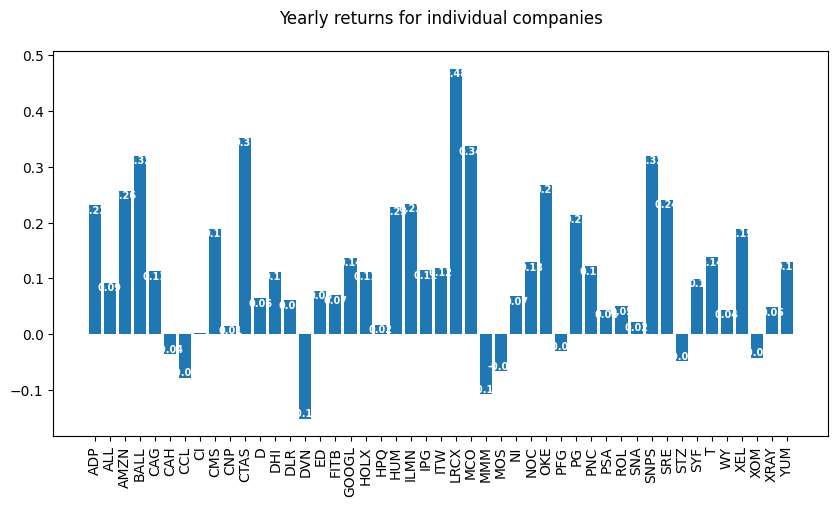

DONE


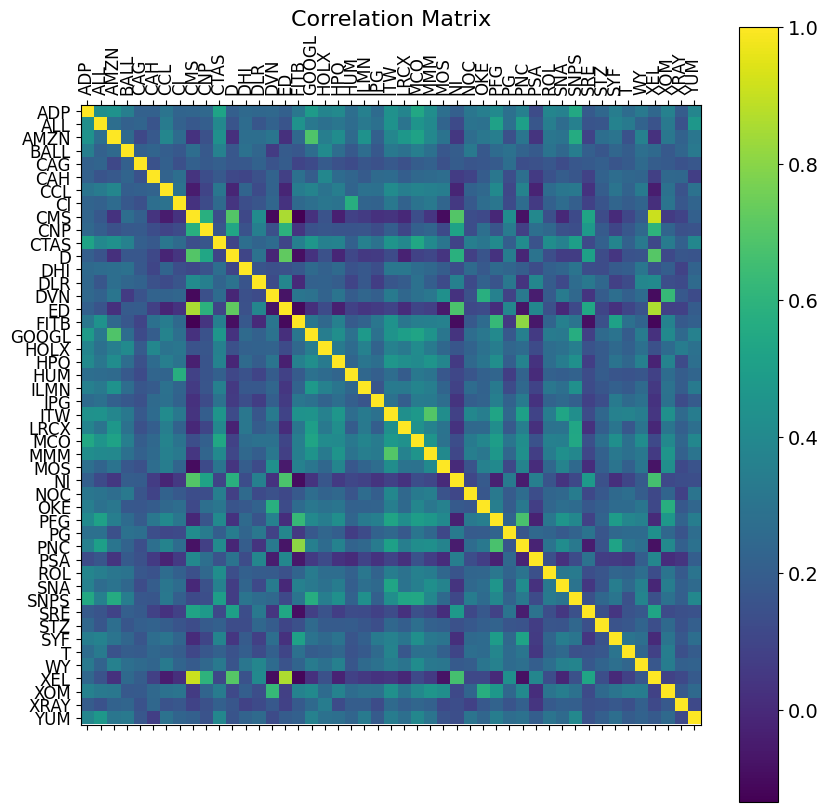

In [ ]:
mu = np.array(ind_er)
cov = np.array(cov_matrix)

corr_matrix = data.pct_change().apply(lambda x: np.log(1+x)).corr()
labels = data.columns

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
k = np.arange(len(mu))
bars = ax.bar(k, mu)

# Add bold white text inside the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2),
            va='bottom' if yval < 0 else 'top', ha='center',
            color='white', fontsize=7, fontweight='bold')

ax.set_xticks(k) # Set x-ticks to be at the positions of the bars.
ax.set_xticklabels(labels, rotation=90) # Set the labels to be the ticker names, with rotation for better readability.

# Set the title inside the graph
ax.set_title('Yearly returns for individual companies', loc='center', pad=20)

plt.show()


f = plt.figure(figsize=(10, 10))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(k, labels, fontsize=12, rotation=90)
plt.yticks(k, labels, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
print("DONE")




## Solve problem with NSGA_II

best combination of stocks - that balances the trade-off between risk (volatility) and return, using the Sharpe Ratio as a measure of investment efficiency

In [ ]:
# import libs
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.repair import Repair
from pymoo.algorithms.moo.sms import SMSEMOA
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
import operator

| Item      | ? |
| --------- | -----:|
|mu| expected returns |
|cov| covariance matrix |
| n_var  | number of variables - It's determined by the length of the ticker list |
| n_obj      |   number of objectives to optimize - minimizing risk and maximizing return |
| xl and xu     |    lower and upper bounds for each variable - each weight can range from 0 (no investment in that stock) to 1 (100% of the portfolio in that stock) |

In [ ]:
class PortfolioProblem(ElementwiseProblem):

    def __init__(self, mu, cov, risk_free_rate=0.02, **kwargs):
        super().__init__(n_var=len(np.array(ticker)), n_obj=2, xl=0.0, xu=1.0, **kwargs)
        self.mu = mu
        self.cov = cov
        self.risk_free_rate = risk_free_rate

    def _evaluate(self, x, out, *args, **kwargs):
        exp_return = x @ self.mu
        exp_risk = np.sqrt(x.T @ self.cov @ x) * np.sqrt(250.0)
        sharpe = (exp_return - self.risk_free_rate) / exp_risk

        out["F"] = [exp_risk, -exp_return]
        out["sharpe"] = sharpe

PortfolioRepair - fundamental rule of portfolio management: the total allocation must equal 100%.

In [ ]:
class PortfolioRepair(Repair):

    def _do(self, problem, X, **kwargs):
        X[X < 1e-3] = 0   # <- eliminate Very Small Values. To avoid dealing with very small numbers
                          # that don't significantly impact the portfolio but might complicate calculations
                          # or interpretation. Essentially, it's saying if you're investing less than 0.1% in an asset,
                          # you might as well not invest in it at all.
        return X / X.sum(axis=1, keepdims=True) # <- this line ensures that each portfolio's allocations sum up to 1 (100%).

In [ ]:
%%time
problem = PortfolioProblem(mu, cov)
algorithm = NSGA2(repair=PortfolioRepair()) # <-reate an instance of the NSGA2 algorithm, specifying a repair strategy through the repair argument.

res = minimize(problem,
               algorithm,
               seed=1,
               verbose=False)


CPU times: user 19.8 s, sys: 1.36 s, total: 21.1 s
Wall time: 21.4 s


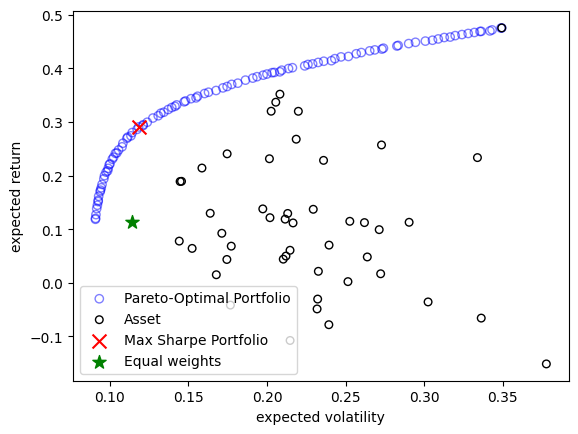

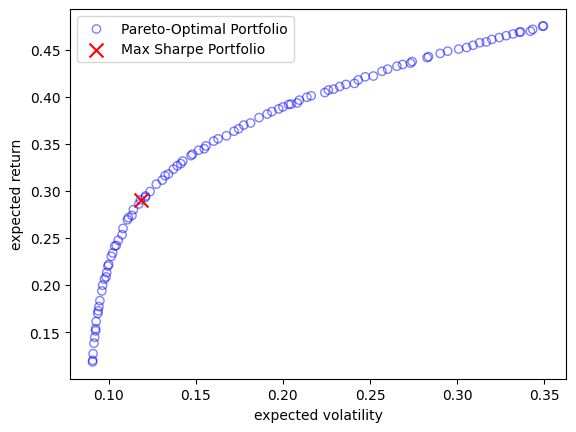

In [ ]:
X, F, sharpe = res.opt.get("X", "F", "sharpe")
F = F * [1, -1]
max_sharpe = sharpe.argmax()

# equal weights
x = np.zeros((len(ticker), 1))
x = x + 1.0/len(x)

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

In [ ]:
allocation = {name: w for name, w in zip(data.columns, X[max_sharpe])}
allocation = sorted(allocation.items(), key=operator.itemgetter(1), reverse=True)

print("Allocation With Best Sharpe")
for name, w in allocation:
    print(f"{name:<5} {w}")

Allocation With Best Sharpe
CTAS  0.17454666455254889
SRE   0.17301910169579504
BALL  0.13773942486190574
LRCX  0.1040582588214583
PG    0.09442172978590976
CMS   0.0832708489778586
XEL   0.07437426808933643
HUM   0.055972984478130414
MCO   0.055566838166417554
OKE   0.047029880570639185
ADP   0.0
ALL   0.0
AMZN  0.0
CAG   0.0
CAH   0.0
CCL   0.0
CI    0.0
CNP   0.0
D     0.0
DHI   0.0
DLR   0.0
DVN   0.0
ED    0.0
FITB  0.0
GOOGL 0.0
HOLX  0.0
HPQ   0.0
ILMN  0.0
IPG   0.0
ITW   0.0
MMM   0.0
MOS   0.0
NI    0.0
NOC   0.0
PFG   0.0
PNC   0.0
PSA   0.0
ROL   0.0
SNA   0.0
SNPS  0.0
STZ   0.0
SYF   0.0
T     0.0
WY    0.0
XOM   0.0
XRAY  0.0
YUM   0.0


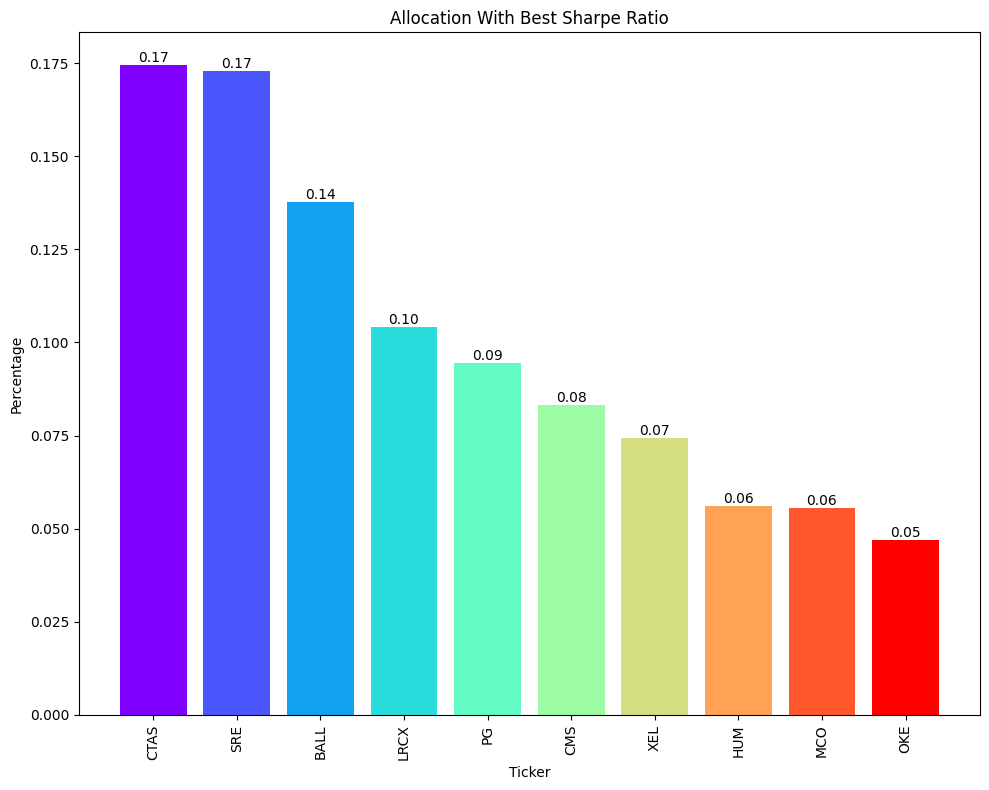

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming 'allocation' is a list of tuples as shown in the output, and applying the filter
allocation_filtered = [(name, w) for name, w in allocation if w > 1e-2]

# Now separating the names and percentages into separate lists
tickers_filtered = [name for name, w in allocation_filtered]
percentages_filtered = [w for name, w in allocation_filtered]

# Sorting the data by percentages in descending order
sorted_indices = np.argsort(percentages_filtered)[::-1]
tickers_sorted = [tickers_filtered[i] for i in sorted_indices]
percentages_sorted = [percentages_filtered[i] for i in sorted_indices]

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Generate a color for each bar using a colormap
colors = cm.rainbow(np.linspace(0, 1, len(tickers_sorted)))

bars = ax.bar(tickers_sorted, percentages_sorted, color=colors)

# Adding the percentage labels on top of each bar
ax.bar_label(bars, fmt='%.2f')

plt.xticks(rotation=90)  # Rotate the tick labels for better legibility
plt.xlabel('Ticker')
plt.ylabel('Percentage')
plt.title('Allocation With Best Sharpe Ratio')
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


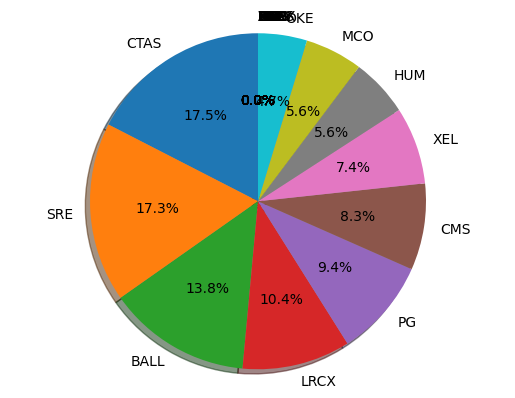

In [ ]:
for al in allocation:
    if al[1] <= 1e-2:
        allocation.remove(al)

col_name = []
w1 = []
for name, w in allocation:
    col_name.append(name)
    w1.append(w)

fig1, ax1 = plt.subplots()
ax1.pie(w1, labels=col_name, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
x = np.zeros((len(ticker), 1))
x = x + 1.0/len(x)

print("For equal weights: \nReturn     = ", (x.T @ mu)[0])
print("Volatility = ", (np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))[0][0])

For equal weights: 
Return     =  0.11259589294622745
Volatility =  0.11440999221507381


In [ ]:
x = X[max_sharpe].T

print("Best Sharpe: \nReturn     = ", x.T @ mu)
print("Volatility = ", np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))

Best Sharpe: 
Return     =  0.29056511562457893
Volatility =  0.11831553798607958


In [ ]:
# Assuming 'mu', 'cov', and 'X[max_sharpe]' are defined and available as in your scenario

# Calculate for Equal Weights Portfolio
x_equal_weights = np.ones((len(ticker), 1)) / len(ticker)
return_equal_weights = (x_equal_weights.T @ mu)[0]
volatility_equal_weights = (np.sqrt(x_equal_weights.T @ cov @ x_equal_weights) * np.sqrt(250.0))[0][0]

# Calculate for Best Sharpe Portfolio
x_best_sharpe = X[max_sharpe].reshape(-1, 1)
return_best_sharpe = (x_best_sharpe.T @ mu)[0]
volatility_best_sharpe = (np.sqrt(x_best_sharpe.T @ cov @ x_best_sharpe) * np.sqrt(250.0))[0][0]

# Creating a DataFrame to compare the results programmatically
comparison_df = pd.DataFrame({
    "Return": [return_equal_weights, return_best_sharpe],
    "Volatility": [volatility_equal_weights, volatility_best_sharpe]
}, index=["Equal Weights", "Best Sharpe"])

comparison_df


,Return,Volatility
Equal Weights,0.112596,0.114410
Best Sharpe,0.290565,0.118316


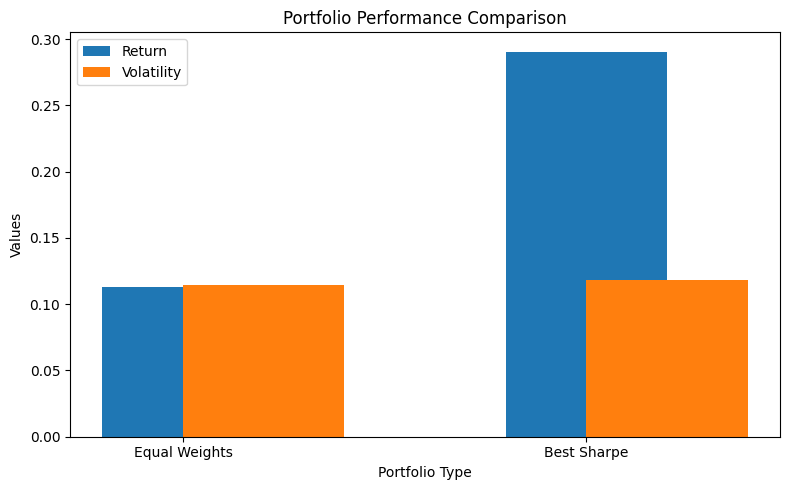

In [ ]:
# Plotting Comparison: Bar Chart

# Importing necessary library for plotting
import matplotlib.pyplot as plt

# Data Preparation
categories = comparison_df.index
returns = comparison_df['Return']
volatilities = comparison_df['Volatility']

x = range(len(categories))

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x, returns, width=0.4, label='Return', align='center')
ax.bar(x, volatilities, width=0.4, label='Volatility', align='edge')

ax.set_xlabel('Portfolio Type')
ax.set_ylabel('Values')
ax.set_title('Portfolio Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()


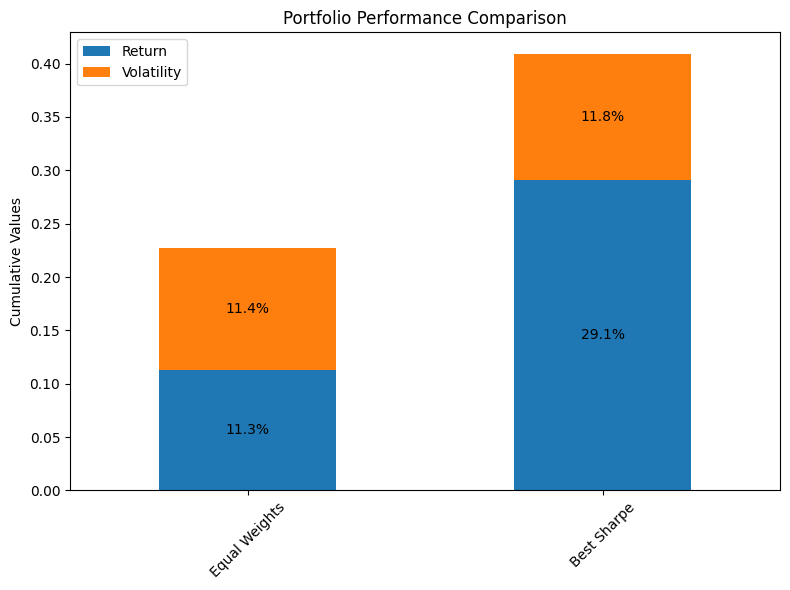

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
comparison_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Portfolio Performance Comparison')
ax.set_ylabel('Cumulative Values')
ax.set_xticklabels(comparison_df.index, rotation=45)

# Adding percentages inside the bars, centered
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2,
            y + height/2,
            '{:.1%}'.format(height),
            ha='center',
            va='center')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


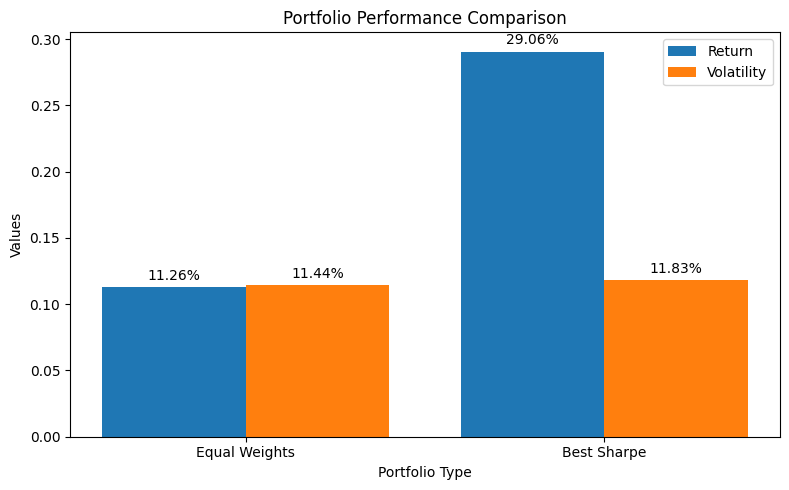

In [ ]:
# Correcting the x range creation for compatibility with setting x-ticks
x = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - 0.2, returns, width=0.4, label='Return')
bars2 = ax.bar(x + 0.2, volatilities, width=0.4, label='Volatility')

ax.set_xlabel('Portfolio Type')
ax.set_ylabel('Values')
ax.set_title('Portfolio Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Adding percentage labels inside the bars for Returns
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2%}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Adding percentage labels inside the bars for Volatility
for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2%}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset above the bar
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()
